In [1]:
import pandas as pd
import gensim
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/DL/emails.csv")
df

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]

In [4]:
#df=df.drop(columns=['id'])

In [5]:
#df.rename(columns={'tweet':'text'},inplace=True)

In [6]:
#df.rename(columns={'label':'spam'},inplace=True)

In [7]:
df

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]

In [8]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [12]:
import re
def remove_specialChar(x):
    text=re.sub(r"http\S+", "", x)
    text=re.sub('[^A-Za-z0-9]+', ' ',text)
    return text

In [13]:
def remove_stopwords(data):
    data=data.split()
    a=[]
    for i in data:
        if i not in stop:
            a.append(i)
    return " ".join(a)

In [14]:
df['text']=df['text'].apply(lambda x:x.lower())

In [15]:
df['text']=df['text'].apply(remove_specialChar)
df['text']=df['text'].apply(remove_stopwords)

In [16]:
y=df.drop(columns=['text'])
y

spam
0        1
1        1
2        1
3        1
4        1
...    ...
5723     0
5724     0
5725     0
5726     0
5727     0

[5695 rows x 1 columns]

In [17]:
df=df[['text']]
df

text
0     subject naturally irresistible corporate ident...
1     subject stock trading gunslinger fanny merrill...
2     subject unbelievable new homes made easy im wa...
3     subject 4 color printing special request addit...
4     subject money get software cds software compat...
...                                                 ...
5723  subject research development charges gpg forwa...
5724  subject receipts visit jim thanks invitation v...
5725  subject enron case study update wow day super ...
5726  subject interest david please call shirley cre...
5727  subject news aurora 5 2 update aurora version ...

[5695 rows x 1 columns]

In [18]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story=[]
for data in df['text']:
    raw_sent=sent_tokenize(data)
    for raw in raw_sent:
        story.append((simple_preprocess(raw)))

In [19]:
story

[['subject',
  'naturally',
  'irresistible',
  'corporate',
  'identity',
  'lt',
  'really',
  'hard',
  'recollect',
  'company',
  'market',
  'full',
  'suqgestions',
  'information',
  'isoverwhelminq',
  'good',
  'catchy',
  'logo',
  'stylish',
  'statlonery',
  'outstanding',
  'website',
  'make',
  'task',
  'much',
  'easier',
  'promise',
  'havinq',
  'ordered',
  'iogo',
  'company',
  'automaticaily',
  'become',
  'world',
  'ieader',
  'isguite',
  'ciear',
  'without',
  'good',
  'products',
  'effective',
  'business',
  'organization',
  'practicable',
  'aim',
  'hotat',
  'nowadays',
  'market',
  'promise',
  'marketing',
  'efforts',
  'become',
  'much',
  'effective',
  'list',
  'clear',
  'benefits',
  'creativeness',
  'hand',
  'made',
  'original',
  'logos',
  'specially',
  'done',
  'reflect',
  'distinctive',
  'company',
  'image',
  'convenience',
  'logo',
  'stationery',
  'provided',
  'formats',
  'easy',
  'use',
  'content',
  'management',

In [20]:
model=gensim.models.Word2Vec(
    window=10,
    min_count=4,
    size=300,
    workers=4,
    
)

In [21]:
model.build_vocab(story)

In [22]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(3492532, 3875530)

In [23]:
model.wv.get_vector('bored')

array([ 3.51416655e-02,  3.30531076e-02,  1.08286981e-02,  5.98220117e-02,
       -3.07053374e-03,  5.12328325e-03,  3.47618037e-03,  3.85330096e-02,
       -8.19456112e-03,  8.86654481e-03, -4.12881561e-02,  2.49834987e-03,
        2.74153729e-03,  1.97987631e-02, -2.08676513e-02,  1.11856973e-02,
       -3.26430909e-02, -3.62484828e-02, -2.02125274e-02,  2.59210430e-02,
       -1.49209576e-03, -7.24702913e-05, -2.20958497e-02,  1.03200320e-02,
       -1.90817509e-02, -2.30113771e-02, -1.01240203e-02, -9.73180588e-03,
        1.30062960e-02, -1.61276124e-02, -4.85756528e-03, -4.49862741e-02,
        1.71074811e-02,  9.00599826e-03,  1.01672383e-02, -3.13554481e-02,
       -5.58294095e-02,  4.60470356e-02,  5.08734249e-02, -1.87387522e-02,
        1.29475147e-02,  5.92555664e-03,  1.41641323e-03,  3.71921202e-03,
       -2.27970090e-02, -6.98020170e-03, -2.78962567e-03, -2.99641583e-02,
        3.73563543e-02, -3.98026705e-02, -2.04243660e-02,  3.31140868e-03,
       -1.45276850e-02,  

In [24]:
vocab=model.wv.vocab

In [25]:
len(vocab)

12951

In [26]:
model.wv.most_similar("bored")

[('cables', 0.9470856189727783),
 ('dream', 0.9449051022529602),
 ('guided', 0.9442539811134338),
 ('mammoth', 0.9416219592094421),
 ('prevent', 0.9415664672851562),
 ('loved', 0.9413388967514038),
 ('favorite', 0.9408490061759949),
 ('secret', 0.9406961798667908),
 ('fantastic', 0.9391503930091858),
 ('unwanted', 0.9390321969985962)]

- Now creating a dictionary with words in vocab and their embeddings. This will be used when we will be creating embedding matrix (for feeding to keras embedding layer)

In [27]:
word_vec=model.wv.vocab
len(word_vec)

12951

In [28]:
len(word_vec) # total number of words

12951

In [29]:
word_vec=list(word_vec)

In [30]:
word_vec_dict={}
for word in word_vec:
  word_vec_dict[word]=model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size
  

The no of key-value pairs :  12951


In [31]:
word_vec_dict

{'subject': array([ 8.39098811e-01, -8.92216802e-01, -1.25181103e+00,  3.67339283e-01,
         5.20146251e-01, -2.41067703e-03,  1.35429084e-01,  8.83328542e-02,
         4.97414649e-01, -1.47478533e+00, -1.20394361e+00, -1.09143245e+00,
        -5.49313545e-01,  1.65524349e-01, -1.59906900e+00,  5.58988392e-01,
         1.27177799e+00, -7.94458985e-01,  9.91686642e-01,  2.50510812e-01,
        -1.11951396e-01,  1.25412226e+00,  1.61593273e-01, -1.02457321e+00,
         2.85519689e-01,  6.05526805e-01,  1.42489767e+00, -6.29232764e-01,
         1.16228104e+00,  6.15029573e-01, -8.59803781e-02, -1.42688572e+00,
        -5.33419013e-01,  5.83525181e-01,  7.50834569e-02, -4.67308015e-01,
         8.74623656e-01,  2.14168429e+00,  8.45635831e-01, -2.10222572e-01,
         9.45476651e-01,  8.10779259e-02,  4.50258672e-01, -4.96914566e-01,
        -1.34396565e+00,  2.80938059e-01, -1.07613087e-01, -1.05138326e+00,
        -4.93563026e-01,  1.49247229e+00, -6.43316507e-01, -3.94794106e-01,
 

In [32]:
df.head()

text
0  subject naturally irresistible corporate ident...
1  subject stock trading gunslinger fanny merrill...
2  subject unbelievable new homes made easy im wa...
3  subject 4 color printing special request addit...
4  subject money get software cds software compat...

In [33]:
maxi=-1
for i,txt in enumerate(df['text']):
    tokens=txt.split()
    if len(tokens)>maxi:
        maxi=len(tokens)
print(maxi)                  # means that in row that is 4331 is max token or words


4331


In [34]:

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence


In [35]:
tok=Tokenizer()
tok.fit_on_texts(df['text'])
vocab_size=len(tok.word_index)+1
encd_rev=tok.texts_to_sequences(df['text'])


In [36]:
len(tok.word_counts)

37186

In [37]:
max_rev_len=4332  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [38]:
# now padding to have a amximum length of 4332
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape   # note that we had 5738 reviews and we have padded each review to have  a lenght of 1565 words.

(5695, 4332)

In [39]:
import numpy as np
df.shape

(5695, 1)

In [40]:
# now creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [41]:
embed_matrix[1]

array([ 0.39737612, -0.14582042, -0.30934325,  0.8464554 ,  0.25395852,
        0.89186096, -0.04199499,  0.281286  ,  0.13522801,  0.03524966,
       -0.40005019, -0.41333374,  0.44497922, -0.59697288, -0.26230437,
        0.3521018 ,  0.6840046 , -0.4347131 ,  0.13058892,  0.58666629,
        0.3747077 ,  0.23936157, -1.54723835, -0.88951558,  0.34479243,
       -0.17373826,  0.87959981,  0.0277089 ,  0.61006421,  0.53772503,
        0.28182393, -0.40737024,  0.41803962,  0.138464  , -0.52004313,
       -0.58436269, -0.38942224, -0.41346404,  0.23854157, -0.04361641,
       -0.6033572 , -0.00431412, -0.56775004,  0.19484234, -0.07942894,
        0.36112794, -1.11954105, -0.55853814, -0.72850752,  0.6765666 ,
       -1.41631401, -0.20533924, -0.31863818,  0.46231788, -1.26039016,
       -0.32598799,  0.43707633, -0.25121644,  0.1552113 ,  0.07007536,
       -0.97852898,  1.24760222,  1.27405572,  0.40503418,  0.84033763,
        0.44648433, -0.16400163, -0.03951639,  0.58057219,  0.75

In [42]:
embed_matrix[3]

array([ 8.39098811e-01, -8.92216802e-01, -1.25181103e+00,  3.67339283e-01,
        5.20146251e-01, -2.41067703e-03,  1.35429084e-01,  8.83328542e-02,
        4.97414649e-01, -1.47478533e+00, -1.20394361e+00, -1.09143245e+00,
       -5.49313545e-01,  1.65524349e-01, -1.59906900e+00,  5.58988392e-01,
        1.27177799e+00, -7.94458985e-01,  9.91686642e-01,  2.50510812e-01,
       -1.11951396e-01,  1.25412226e+00,  1.61593273e-01, -1.02457321e+00,
        2.85519689e-01,  6.05526805e-01,  1.42489767e+00, -6.29232764e-01,
        1.16228104e+00,  6.15029573e-01, -8.59803781e-02, -1.42688572e+00,
       -5.33419013e-01,  5.83525181e-01,  7.50834569e-02, -4.67308015e-01,
        8.74623656e-01,  2.14168429e+00,  8.45635831e-01, -2.10222572e-01,
        9.45476651e-01,  8.10779259e-02,  4.50258672e-01, -4.96914566e-01,
       -1.34396565e+00,  2.80938059e-01, -1.07613087e-01, -1.05138326e+00,
       -4.93563026e-01,  1.49247229e+00, -6.43316507e-01, -3.94794106e-01,
        1.19516361e+00,  

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# prepare train and val sets first
# oh=OneHotEncoder(sparse=False)
# Y=oh.fit_transform(y[['spam']])  # one hot target as required by NN.
pad_rev=np.array(pad_rev)
Y=np.array(y['spam'])
x_train,x_test,y_train,y_test=train_test_split(pad_rev,Y,test_size=0.2,random_state=42)

In [44]:
print(Y)

[1 1 1 ... 0 0 0]


In [46]:
from keras.initializers import Constant
from keras.layers import ReLU
from keras.layers import Dropout
import tensorflow as tf
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
# model.add(CuDNNLSTM(64,return_sequences=False)) # loss stucks at about 
#model.add(LSTM(100))
# model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.20))
model.add(tf.keras.layers.Bidirectional(LSTM(80)))
model.add(Dropout(0.40))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1,activation='sigmoid'))  # sigmod for bin. classification.

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4332, 300)         11156100  
                                                                 
 bidirectional (Bidirectiona  (None, 160)              243840    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 24)                3864      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                      

In [48]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [49]:
# compile the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
# specify batch size and epocj=hs for training.
epochs=25
batch_size=64

In [51]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/25
72/72 [==============================] - 44s 493ms/step - loss: 0.1452 - accuracy: 0.9368 - val_loss: 0.0756 - val_accuracy: 0.9798
Epoch 2/25
72/72 [==============================] - 32s 445ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.1004 - val_accuracy: 0.9851
Epoch 3/25
72/72 [==============================] - 30s 422ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.1202 - val_accuracy: 0.9816
Epoch 4/25
72/72 [==============================] - 31s 426ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0984 - val_accuracy: 0.9868
Epoch 5/25
72/72 [==============================] - 31s 432ms/step - loss: 2.3119e-04 - accuracy: 1.0000 - val_loss: 0.1192 - val_accuracy: 0.9868
Epoch 6/25
72/72 [==============================] - 30s 423ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1612 - val_accuracy: 0.9816
Epoch 7/25
72/72 [==============================] - 30s 420ms/step - loss: 8.7305e-05 - accuracy: 1.0000 - val_loss: 0.1421 - val_accuracy

In [52]:
x_test[0]

array([   3, 1376,  649, ...,    0,    0,    0], dtype=int32)

In [53]:
y_pred=model.predict(x_test)

In [54]:
y_pred

array([[1.6695121e-11],
       [9.3739855e-01],
       [1.8719807e-11],
       ...,
       [3.7168404e-11],
       [9.9999988e-01],
       [1.0000000e+00]], dtype=float32)

In [55]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [56]:
y_test.shape

(1139,)

In [57]:
y_pred

array([[1.6695121e-11],
       [9.3739855e-01],
       [1.8719807e-11],
       ...,
       [3.7168404e-11],
       [9.9999988e-01],
       [1.0000000e+00]], dtype=float32)

In [58]:
#y_pred = y_pred.argmax(axis=-1)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
#accuracy_score(y_test,y_pred)

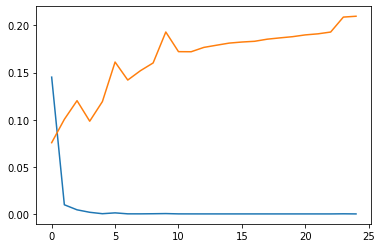

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

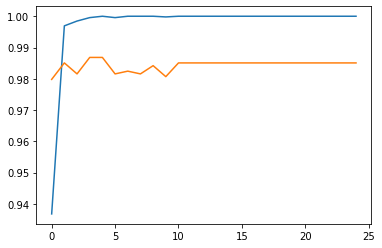

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [63]:
a=[]
for d in y_pred:
  if d>0.7:
    a.append(1)
  else:
    a.append(0)

In [64]:
a=np.array(a)

In [65]:
accuracy_score(a,y_test)

0.9841966637401229